In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import env
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def acquire_zillow_sfr():
    '''
    This function will retrieve zillow home data for 2017 properties. It will only get
    single family residential properties. the function will attempt to open the data from 
    a local csv file, if one is not found, it will download the data from the codeup
    database. An env file is needed in the local directory in order to run this file.
    '''
    if os.path.exists('zillow_2017_sfr.csv'):
        print('opening data from local file')
        df = pd.read_csv('zillow_2017_sfr.csv', index_col=0)
    else:
        # run sql query and write to csv
        print('local file not found')
        print('retrieving data from sql server')
        query = '''
    SELECT 
    bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, 
    taxvaluedollarcnt, yearbuilt, taxamount, fips
    FROM properties_2017
    WHERE propertylandusetypeid IN(
        SELECT propertylandusetypeid
        FROM propertylandusetype
        WHERE propertylandusedesc = "Single Family Residential")
    -- LIMIT 1000
    ;
        '''
        connection = env.get_db_url('zillow')
        df = pd.read_sql(query, connection)
        df.to_csv('zillow_2017_sfr.csv')

    return df

In [19]:
df = acquire_zillow_sfr()
df

opening data from local file


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152860,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


In [5]:
df.shape

(2152863, 7)

In [6]:
df.fips.value_counts()

6037.0    1431811
6059.0     555077
6111.0     165975
Name: fips, dtype: int64

In [11]:
df.isna().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [20]:
df[df.calculatedfinishedsquarefeet.isna() == True]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
5,0.0,0.0,NaN,124.0,NaN,NaN,6037.0
...,...,...,...,...,...,...,...
2152823,0.0,0.0,NaN,2568893.0,NaN,27309.30,6059.0
2152844,0.0,0.0,NaN,92679.0,NaN,1090.16,6111.0
2152854,0.0,0.0,NaN,1198476.0,NaN,NaN,6037.0
2152857,0.0,0.0,NaN,1087111.0,NaN,19313.08,6059.0


notice that all of the rows with a null calculated square feet value has 0 bedrooms, 0 bathrooms and null year built value, which to me indicates that there is no house built on the plot yet. So lets drop the null values.

In [9]:
df = df.dropna()

In [12]:
for col in df.columns:
    print(df[col].value_counts())

3.0     962944
4.0     633608
2.0     334221
5.0     150671
6.0      25117
1.0      22895
7.0       4792
0.0       4397
8.0       1103
9.0        290
10.0       118
11.0        34
13.0        15
12.0        12
14.0         7
15.0         5
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64
2.00     942463
3.00     422398
1.00     412582
2.50     142827
4.00      82039
1.50      31157
3.50      28464
5.00      28306
4.50      19474
6.00      10717
5.50       6201
7.00       4381
0.00       4274
8.00       1681
6.50       1330
9.00        707
7.50        382
10.00       322
11.00       145
8.50        108
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathroomcnt, dtype: int64
1200.0     5184
1080.0     4376
1120.0     4

we still have houses with 0 bathrooms or 0 bedrooms? are they shacks? since this is a small portion of our data, lets drop them also

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.6 MB


all of the dtypes are float, do they need to be?

In [12]:
for col in df:
    print(f'{col}')
    equal_int = (df[col] == df[col].astype(int)).mean()
    print(equal_int)

bedroomcnt
1.0
bathroomcnt
0.8925192794249229
calculatedfinishedsquarefeet
1.0
taxvaluedollarcnt
1.0
yearbuilt
1.0
taxamount
0.013370027123189743
fips
1.0


looks like bathroomcnt and taxamount need to be float, the others can be int

In [14]:
df.bedroomcnt = df.bedroomcnt.astype(int)
df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.astype(int)
df.yearbuilt = df.yearbuilt.astype(int)
df.taxvaluedollarcnt = df.taxvaluedollarcnt.astype(int)
df.fips = df.fips.astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5326 entries, 11 to 2152710
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    5326 non-null   int64  
 1   bathroomcnt                   5326 non-null   float64
 2   calculatedfinishedsquarefeet  5326 non-null   int64  
 3   taxvaluedollarcnt             5326 non-null   int64  
 4   yearbuilt                     5326 non-null   int64  
 5   taxamount                     5326 non-null   float64
 6   fips                          5326 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 332.9 KB


In [17]:
mask = ((df.bathroomcnt == 0) | (df.bedroomcnt == 0))
df[mask]

In [18]:
mask = (df.bathroomcnt == 0) | (df.bedroomcnt == 0)

df = df[~mask]

df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips


In [24]:
for col in df.columns:
    print(df[col].value_counts())

3     962638
4     633362
2     334078
5     150598
6      25104
1      22752
7       4791
8       1102
9        290
10       118
11        33
13        15
12        12
14         6
15         5
16         2
18         2
25         1
Name: bedroomcnt, dtype: int64
2.00     942326
3.00     422358
1.00     411776
2.50     142811
4.00      82030
1.50      31155
3.50      28460
5.00      28297
4.50      19469
6.00      10716
5.50       6200
7.00       4381
8.00       1680
6.50       1328
9.00        705
7.50        379
10.00       321
11.00       145
8.50        108
12.00        72
9.50         49
13.00        38
14.00        23
15.00        15
10.50        14
0.50         14
16.00        11
18.00         7
20.00         5
1.75          3
17.00         3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathroomcnt, dtype: int64
1200     5164
1080     4370
1120     4335
1400     3828
1440     3672
         ... 
179         1
7320        1

In [36]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.134907e+06,2.134907e+06,2.134907e+06,2.134907e+06,2.134907e+06,2.134907e+06,2.134907e+06
mean,3.308328e+00,2.245187e+00,1.863730e+03,4.608771e+05,1.960985e+03,5.619627e+03,6.048304e+03
std,9.211600e-01,9.858442e-01,9.632262e+02,6.746808e+05,2.213405e+01,7.784646e+03,2.032450e+01
min,1.000000e+00,5.000000e-01,1.000000e+00,2.200000e+01,1.801000e+03,1.648000e+01,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.260000e+03,1.896280e+05,1.949000e+03,2.546700e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.624000e+03,3.288570e+05,1.958000e+03,4.116040e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.209000e+03,5.350000e+05,1.976000e+03,6.415760e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,5.922000e+04,9.018846e+07,2.016000e+03,1.078102e+06,6.111000e+03


distribution of bedroomcnt


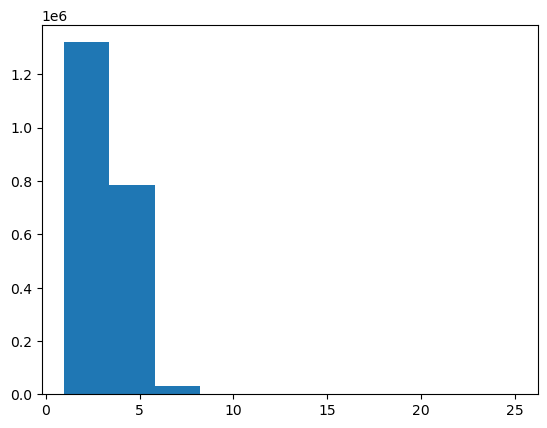

distribution of bathroomcnt


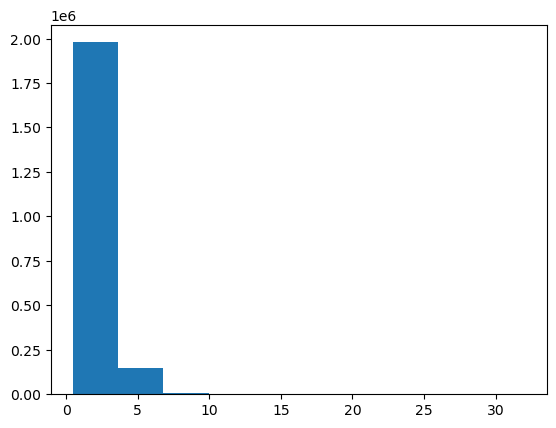

distribution of calculatedfinishedsquarefeet


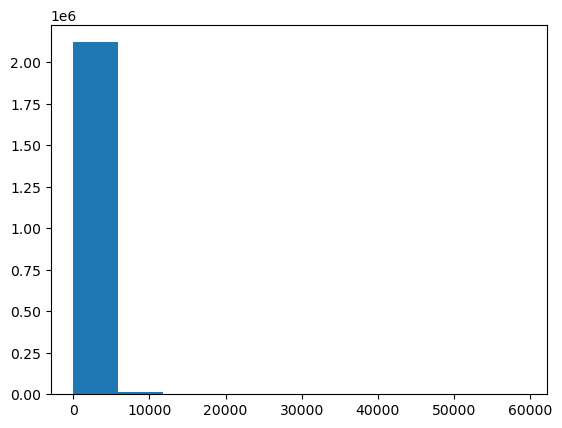

distribution of taxvaluedollarcnt


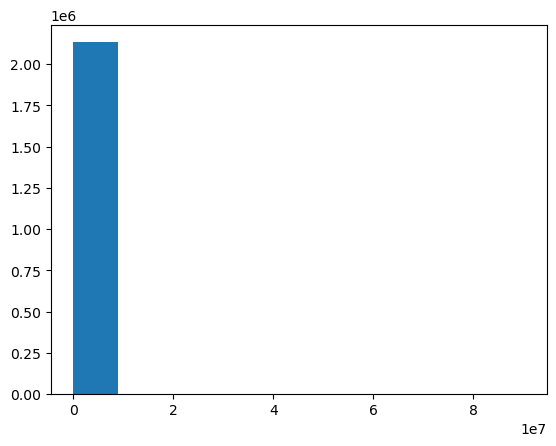

distribution of yearbuilt


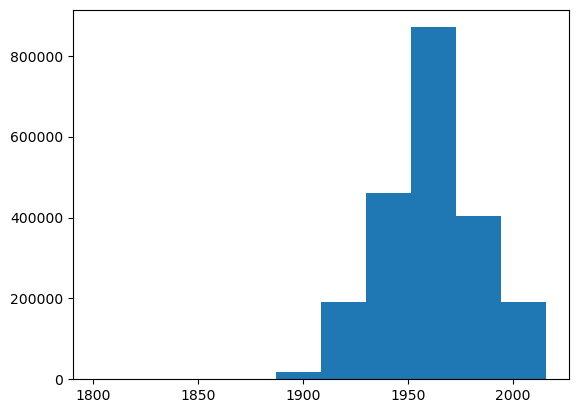

distribution of taxamount


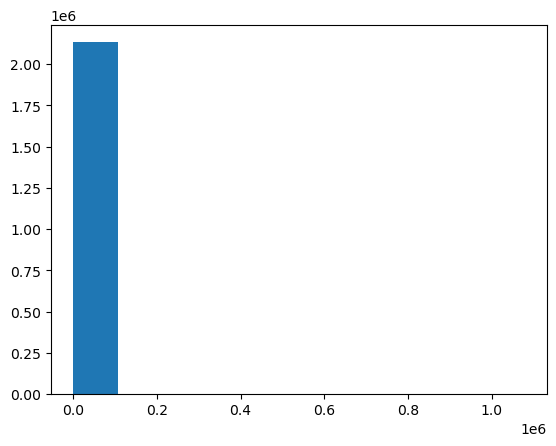

distribution of fips


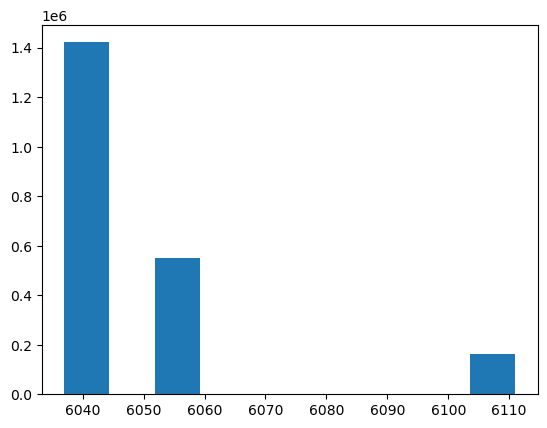

In [33]:
for col in df:
    print(f'distribution of {col}')
    plt.hist(data=df, x=col)
    plt.show()

distribution of bedroomcnt


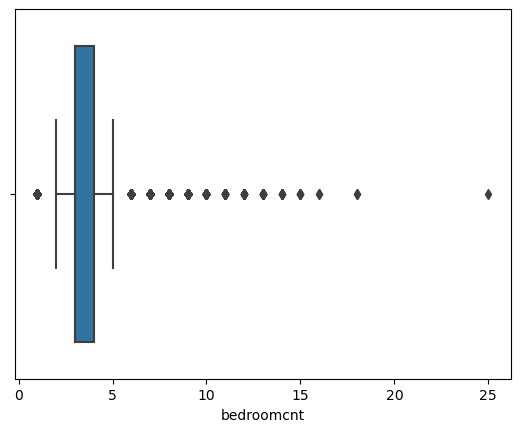

distribution of bathroomcnt


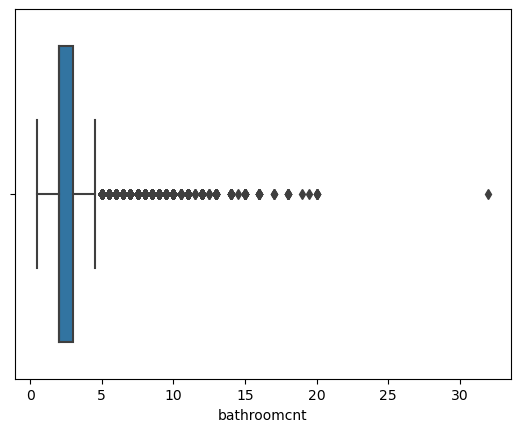

distribution of calculatedfinishedsquarefeet


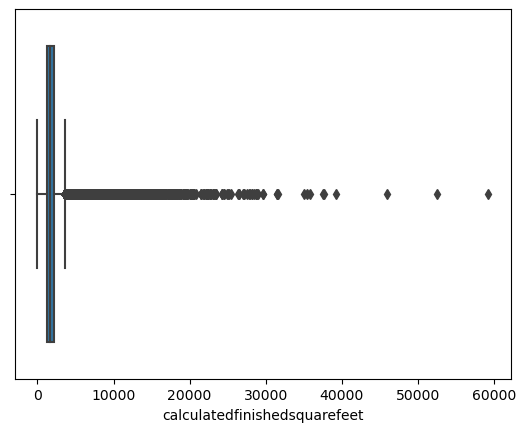

distribution of taxvaluedollarcnt


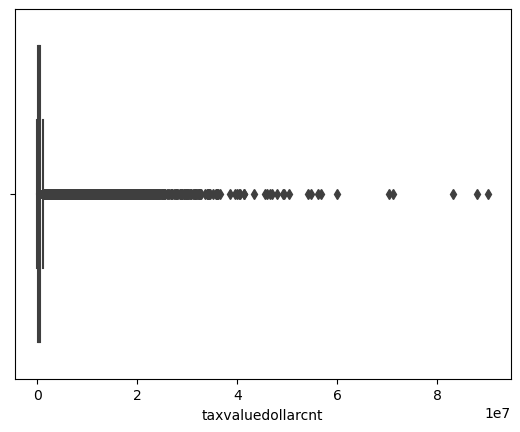

distribution of yearbuilt


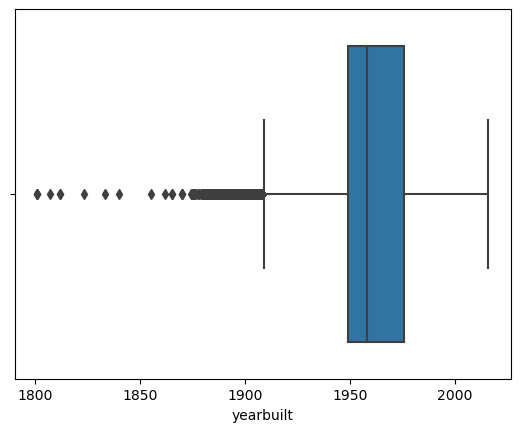

distribution of taxamount


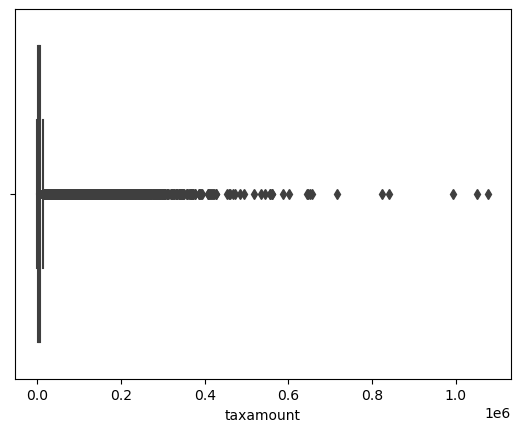

distribution of fips


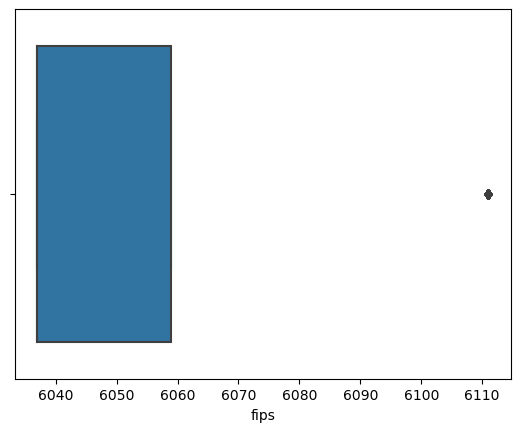

In [34]:
for col in df:
    print(f'distribution of {col}')
    sns.boxplot(data=df, x=col)
    plt.show()

In [28]:
df.drop(df.calculatedfinishedsquarefeet.max())

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
18,3,1.0,1244,169471,1950,2532.88,6037
19,3,2.0,1300,233266,1950,3110.99,6037
...,...,...,...,...,...,...,...
2152856,4,4.0,4375,422400,2015,13877.56,6037
2152858,4,3.0,2262,960756,2015,13494.52,6059
2152859,4,4.5,3127,536061,2014,6244.16,6059
2152861,3,2.5,1974,424353,2015,5302.70,6059


In [31]:
df[df.calculatedfinishedsquarefeet == df.calculatedfinishedsquarefeet.max()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
849924,4,4.0,952576,742727,1964,7694.72,6059


there is a single family residence with 4 bedrooms and 4 bathrooms and 952,576 sq feet? is it the white house or something? lets drop this one with crazy values

In [32]:
mask = df.calculatedfinishedsquarefeet == df.calculatedfinishedsquarefeet.max()
df = df[~mask]
df.calculatedfinishedsquarefeet.max()

59220

In [18]:
df.taxvaluedollarcnt.value_counts().sort_values()

86489       1
457153      1
280099      1
561102      1
420903      1
         ... 
440000    680
430000    690
400000    722
500000    773
450000    817
Name: taxvaluedollarcnt, Length: 586498, dtype: int64

In [16]:
def clean_zillow_sfr(df):
    '''
    this function will take in a DataFrame of zillow single family resident data,
    it will then remove rows will null values, then remove rows with 0 bedrooms or 
    0 bathrooms, it will then change dtypes of bedroomcnt, calculatedfinishedsquarefeet,
    taxvaluedollarcnt, yearbuilt, and fips to integer, then return the cleaned df
    '''
    # drop rows with null values
    df = df.dropna()
    # change dtypes of columns to int
    df.bedroomcnt = df.bedroomcnt.astype(int)
    df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.astype(int)
    df.yearbuilt = df.yearbuilt.astype(int)
    df.taxvaluedollarcnt = df.taxvaluedollarcnt.astype(int)
    df.fips = df.fips.astype(int)
    # drop rows with 0 bedrooms or 0 bathrooms
    mask = (df.bathroomcnt == 0) | (df.bedroomcnt == 0)
    df = df[~mask]
    # there is a house with erronious data 
    # with 4 bedrooms and 4 bathrooms and 952,576 sq feet. lets drop that
    mask = df.calculatedfinishedsquarefeet == df.calculatedfinishedsquarefeet.max()
    df = df[~mask]
    # return the cleaned dataFrame
    return df

In [19]:
def split_zillow(df):
    '''
    this function will take in a cleaned zillow dataFrame and return the data split into
    train, validate and test dataframes in preparation for ml modeling.
    '''
    train_val, test = train_test_split(df,
                                      random_state=1342,
                                      train_size=0.8)
    train, validate = train_test_split(train_val,
                                      random_state=1342,
                                      train_size=0.7)
    return train, validate, test

In [20]:
def wrangle_zillow():
    return split_zillow(
        clean_zillow_sfr(
            acquire_zillow_sfr()))

In [21]:
train, validate, test = wrangle_zillow()

opening data from local file


/var/folders/49/v6sf5vy165dghytk4qv6jfhc0000gn/T/ipykernel_2002/211045716.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bedroomcnt = df.bedroomcnt.astype(int)
/var/folders/49/v6sf5vy165dghytk4qv6jfhc0000gn/T/ipykernel_2002/211045716.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.astype(int)
/var/folders/49/v6sf5vy165dghytk4qv6jfhc0000gn/T/ipykernel_2002/211045716.py:13: SettingWithCopyWarning: 
A value is trying to be set on a

In [22]:
train.shape, validate.shape, test.shape

((1195548, 7), (512379, 7), (426982, 7))

In [35]:
validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512379 entries, 1521956 to 1969056
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   bedroomcnt                    512379 non-null  int64  
 1   bathroomcnt                   512379 non-null  float64
 2   calculatedfinishedsquarefeet  512379 non-null  int64  
 3   taxvaluedollarcnt             512379 non-null  int64  
 4   yearbuilt                     512379 non-null  int64  
 5   taxamount                     512379 non-null  float64
 6   fips                          512379 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 31.3 MB
